In [1]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import random

/home/seung/.venv/py3Keras/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/seung/.venv/py3Keras/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/seung/.venv/py3Keras/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# generate a sequence of sine
def generate_sequence(length, f=2, Fs=100):
    #fs = 100  # sample rate
    #f = 2  # the frequency of the signal

    x = np.arange(length)
    y = np.sin(2 * np.pi * f * x / Fs)
    return x, y


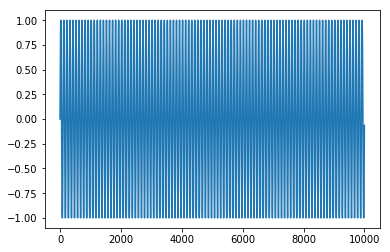

In [3]:
length=10000
x0, y0 = generate_sequence(length, f=1, Fs=100)
plt.plot(x0,y0)
plt.show()

In [4]:
y0[:10]

array([0.        , 0.06279052, 0.12533323, 0.18738131, 0.24868989,
       0.30901699, 0.36812455, 0.42577929, 0.48175367, 0.53582679])

In [5]:
y0[2:2+3]

array([0.12533323, 0.18738131, 0.24868989])

In [17]:
print(np.shape(x0))
print(np.shape(x0[:-1]))
print(np.shape(np.hstack(([0], x0[:-1]))))

(10000,)
(9999,)
(10000,)


In [7]:
# configure problem
#n_features = 50 + 1
n_steps_in = 10*5
n_steps_out = 5*5

In [18]:
def get_dataset_single(n_in, n_out, signal_ori):
    signal_len=len(signal_ori)
    target_len = n_in+n_out
    r = random.randint(0, signal_len - 1 - target_len)
    
    x_in = signal_ori[r:r+n_in]
    x_out = signal_ori[r+n_in:r+n_in+n_out]
    #target_in = [0] + signal_ori[r+n_in:r+n_in+n_out-1] #x_in[:-1]
    target_in = np.hstack(([0] , signal_ori[r+n_in:r+n_in+n_out-1])) #x_in[:-1]
    
    x2 = target_in
    return x_in, x2, x_out
    #_, x_train = 

50 25 25
[  0.          -6.84547106  -7.28968627  -7.70513243  -8.09016994
  -8.44327926  -8.7630668   -9.04827052  -9.29776486  -9.51056516
  -9.68583161  -9.82287251  -9.92114701  -9.98026728 -10.
  -9.98026728  -9.92114701  -9.82287251  -9.68583161  -9.51056516
  -9.29776486  -9.04827052  -8.7630668   -8.44327926  -8.09016994]
[ -6.84547106  -7.28968627  -7.70513243  -8.09016994  -8.44327926
  -8.7630668   -9.04827052  -9.29776486  -9.51056516  -9.68583161
  -9.82287251  -9.92114701  -9.98026728 -10.          -9.98026728
  -9.92114701  -9.82287251  -9.68583161  -9.51056516  -9.29776486
  -9.04827052  -8.7630668   -8.44327926  -8.09016994  -7.70513243]
50 25 25
[  0.          -8.44327926  -8.7630668   -9.04827052  -9.29776486
  -9.51056516  -9.68583161  -9.82287251  -9.92114701  -9.98026728
 -10.          -9.98026728  -9.92114701  -9.82287251  -9.68583161
  -9.51056516  -9.29776486  -9.04827052  -8.7630668   -8.44327926
  -8.09016994  -7.70513243  -7.28968627  -6.84547106  -6.3742399

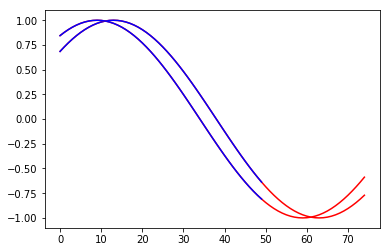

In [20]:
for i in range(2):
    x_in, x2, x_out = get_dataset_single(n_steps_in, n_steps_out, y0)
    print(len(x_in), len(x2),len(x_out))
    print(x2*10)
    print(x_out*10)
    t_in = np.arange(n_steps_in)
    t = np.arange(n_steps_in+n_steps_out)

    x = np.hstack((x_in, x_out))
    #print(np.shape(x))

    plt.plot(t,x,'r')
    plt.plot(t_in,x_in,'b')

In [21]:
def get_dataset2(n_in, n_out, signal_ori, n_samples, bdisplay=False):
    X1, X2, y = list(), list(), list()
    for i in range(n_samples):
        x_in, x2, x_out = get_dataset_single(n_steps_in, n_steps_out, y0)
        #print(len(x_in), len(x_out))
        
        X1.append(x_in)
        X2.append(x2)
        y.append(x_out)
        
        if bdisplay:
            t_in = np.arange(n_steps_in)
            t = np.arange(n_steps_in+n_steps_out)

            x = np.hstack((x_in, x_out))
            #print(np.shape(x))

            plt.plot(t,x,'r')
            plt.plot(t_in,x_in,'b')
            
    return array(X1), array(X2), array(y)

In [22]:
X1, X2, y =  get_dataset2(n_steps_in, n_steps_out, y0, 10)
print(X1.shape, X2.shape, y.shape)

(10, 50) (10, 25) (10, 25)
